In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [7]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
print(data.describe())

              Time           V1           V2           V3           V4  \
count  1986.000000  1986.000000  1986.000000  1986.000000  1986.000000   
mean    761.035750    -0.284195     0.266886     0.848005     0.151216   
std     451.034025     1.353508     1.142026     1.012645     1.264932   
min       0.000000   -11.140706   -12.114213   -12.389545    -4.657545   
25%     366.000000    -1.045512    -0.204111     0.280517    -0.670513   
50%     750.000000    -0.437621     0.314294     0.864505     0.190698   
75%    1161.000000     1.095047     0.926126     1.486942     1.002546   
max    1526.000000     1.685314     6.118940     4.017561     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  1986.000000  1986.000000  1986.000000  1986.000000  1986.000000  ...   
mean     -0.077457     0.050205     0.138347    -0.058795     0.012145  ...   
std       1.272512     1.274204     1.140750     0.966493     0.900828  ...   
min     -32.09212

In [9]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0010085728693898135
Fraud Cases: 2
Valid Transactions: 1983


In [10]:
print("Amount Details of the fraudulent transaction")
fraud.Amount.describe()

Amount Details of the fraudulent transaction


,Amount
count,2.000000
mean,264.500000
std,374.059487
min,0.000000
25%,132.250000
50%,264.500000
75%,396.750000
max,529.000000


In [11]:
print("Details of valid transaction")
valid.Amount.describe()

Details of valid transaction


,Amount
count,1983.000000
mean,68.404892
std,241.572682
min,0.000000
25%,4.950000
50%,15.090000
75%,63.285000
max,7712.430000


In [12]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(1986, 30)
(1986,)


In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

ValueError: Input y contains NaN.

In [21]:
# Original code to create X and Y
X = data.drop(['Class'], axis = 1)
Y = data["Class"]

# Check for NaN value
nan_mask = Y.isna()
if nan_mask.any():
    print(f"Warning: Removing {nan_mask.sum()} rows with NaN values in the 'Class' column.")
    X = X[~nan_mask]
    Y = Y[~nan_mask]

print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

# Print NaN counts to confirm removal
print("NaN values in yData before split (after removal):", np.isnan(yData).sum())
print("NaN values in yTrain after split:", np.isnan(yTrain).sum())
print("NaN values in yTest after split:", np.isnan(yTest).sum())

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

(1985, 30)
(1985,)
NaN values in yData before split (after removal): 0
NaN values in yTrain after split: 0
NaN values in yTest after split: 0


In [22]:
from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())

NaN values in yTest before imputation: 0
NaN values in yTest after imputation: 0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py

Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Matthews Correlation Coefficient: 0.0000


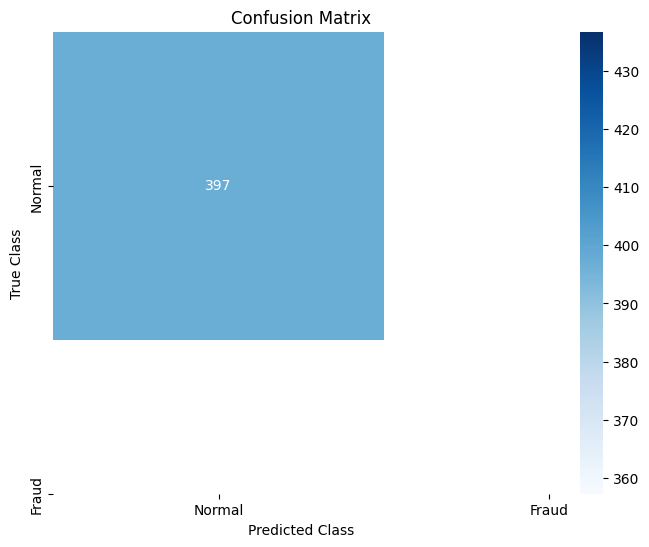

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix # Evaluation metrics
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

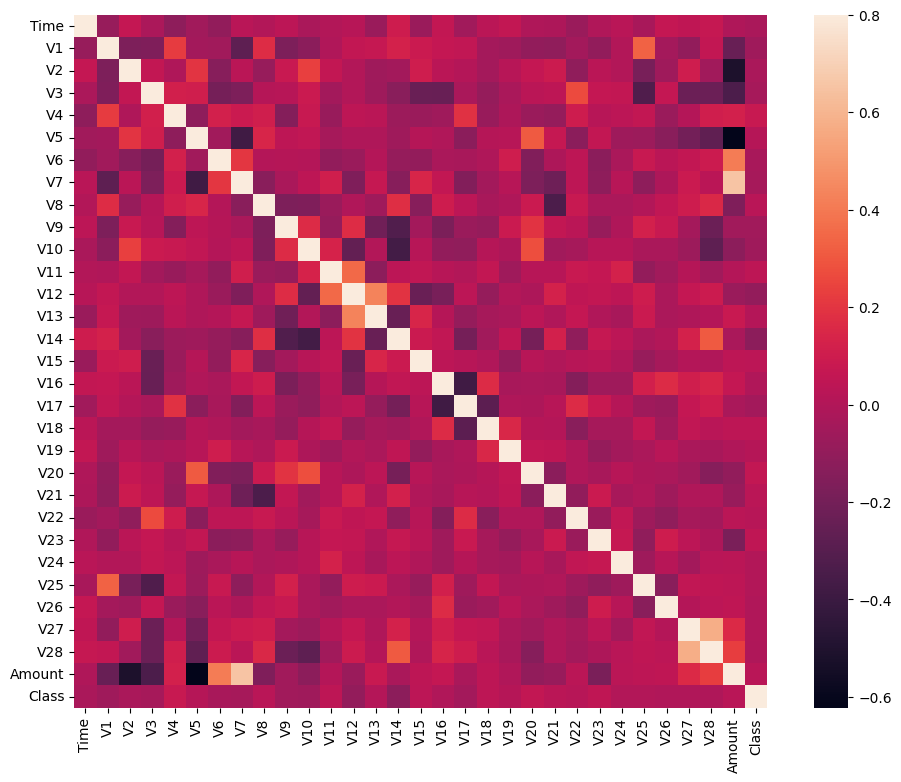

In [19]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()